In [1]:
import pandas as pd  # Importamos la biblioteca pandas para trabajar con datos tabulares
import numpy as np  # Importamos la biblioteca numpy para operaciones numéricas y arreglos
import ast  # Importamos el módulo ast para trabajar con evaluación de expresiones literales de Python
import re  # Importamos el módulo re para trabajar con expresiones regulares
import os # Importar el módulo os para operaciones relacionadas con el sistema
import seaborn as sns # Importar el módulo seaborn para graficas
import matplotlib.pyplot as plt # Importar el módulo matplotlib para graficas y analisis

In [2]:
# Definición de la URL base para la descarga de archivos
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/Andresma9601/Proyecto_ML_HENRY/main/"

In [3]:
# Ruta relativa del primer archivo de dataset de movies_dataset
movies_dataset1 = "db_movies/movies_dataset1.csv"
# Ruta relativa del segundo archivo de dataset de movies_dataset
movies_dataset2 = "db_movies/movies_dataset2.csv"
# Ruta relativa del primer archivo de credits en formato parquet
credits1 = "db_movies/credits1.parquet"
# Ruta relativa del segundo archivo de credits en formato parquet
credits2 = "db_movies/credits2.parquet"
# Ruta relativa del tercer archivo de credits en formato parquet
credits3 = "db_movies/credits3.parquet"

In [4]:
# Lectura del archivo MOVIES_DATASET1.CSV y almacenamiento en un DataFrame
df1= pd.read_csv(DOWNLOAD_ROOT+movies_dataset1)

In [5]:
# Lectura del archivo MOVIES_DATASET2.CSV y almacenamiento en un DataFrame
df2=pd.read_csv(DOWNLOAD_ROOT+movies_dataset2)

In [6]:
# Concatenar los dos DataFrames creados anteriormente
df = pd.concat([df1, df2], axis=0)
df = df.reset_index(drop=True)

In [7]:
# Ver las primeras 5 filas del Dataframe
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [8]:
# Ver las ultimas 5 filas del Dataframe
df.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


In [9]:
# Lectura del archivo CREDITS1.parquet y almacenamiento en un DataFrame
df1=pd.read_parquet(DOWNLOAD_ROOT+credits1)

In [10]:
# Lectura del archivo CREDITS2.parquet y almacenamiento en un DataFrame
df2=pd.read_parquet(DOWNLOAD_ROOT+credits2)

In [11]:
# Lectura del archivo CREDITS3.parquet y almacenamiento en un DataFrame
df3=pd.read_parquet(DOWNLOAD_ROOT+credits3)

In [12]:
# Concatenar los tres DataFrames creados anteriormente
df2 = pd.concat([df1, df2, df3], axis=0)
df2 = df2.reset_index(drop=True)

In [13]:
# Ver las primeras 5 filas del Dataframe
df2.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [14]:
# Ver las ultimas 5 filas del Dataframe
df2.tail()

,cast,crew,id
45471,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de...",439050
45472,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...",111109
45473,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",67758
45474,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",227506
45475,[],"[{'credit_id': '593e676c92514105b702e68e', 'de...",461257


In [15]:
# Ver informacion del Dataframe
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [16]:
# Ver informacion del segundo Dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [17]:
# Acceder a la columna "belongs_to_collection" y mostrar los primeros 10 valores
df["belongs_to_collection"].head(10) 

0    {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                  NaN
2    {'id': 119050, 'name': 'Grumpy Old Men Collect...
3                                                  NaN
4    {'id': 96871, 'name': 'Father of the Bride Col...
5                                                  NaN
6                                                  NaN
7                                                  NaN
8                                                  NaN
9    {'id': 645, 'name': 'James Bond Collection', '...
Name: belongs_to_collection, dtype: object

In [18]:
# Calcular la cantidad de valores nulos en la columna "belongs_to_collection"
df["belongs_to_collection"].isnull().sum()

40972

In [19]:
# Crear una lista para almacenar los DataFrames desanidados
dataframes_desanidados = []

# Recorrer los valores de la columna "belongs_to_collection"
for i in df["belongs_to_collection"]:
    # Verificar si el valor no es nulo
    if pd.notnull(i):
        # Convertir la cadena a un diccionario utilizando ast.literal_eval
        diccionario = ast.literal_eval(i)
        # Crear un DataFrame a partir del diccionario
        desanidado = pd.DataFrame([diccionario])
        # Agregar el DataFrame desanidado a la lista
        dataframes_desanidados.append(desanidado)
    # Verificar si el valor es nulo
    elif pd.isnull(i):
        # Crear un DataFrame con el valor nulo
        desanidado = pd.DataFrame([i])
        # Agregar el DataFrame a la lista
        dataframes_desanidados.append(desanidado)
    

In [20]:
# Concatenar los DataFrames desanidados en un único DataFrame
collection=pd.concat(dataframes_desanidados, ignore_index=True)

In [21]:
collection.head() # Ver los primeros 5 valores del Dataframe collection

,id,name,poster_path,backdrop_path,0
0,10194.0,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,NaN
1,NaN,NaN,NaN,NaN,NaN
2,119050.0,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,NaN
3,NaN,NaN,NaN,NaN,NaN
4,96871.0,Father of the Bride Collection,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,NaN


In [22]:
# Eliminar la columna con etiqueta 0 del DataFrame collection
collection.drop(0, axis=1, inplace=True)

In [23]:
collection

,id,name,poster_path,backdrop_path
0,10194.0,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg
1,NaN,NaN,NaN,NaN
2,119050.0,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg
3,NaN,NaN,NaN,NaN
4,96871.0,Father of the Bride Collection,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg
...,...,...,...,...
45461,NaN,NaN,NaN,NaN
45462,NaN,NaN,NaN,NaN
45463,NaN,NaN,NaN,NaN
45464,NaN,NaN,NaN,NaN


In [24]:
# Iterar sobre la columna "id" del DataFrame "collection"
for i in collection["id"]:
    # Imprimir el tipo del valor en la columna "id"
    print(type(i))
    # Interrumpir el bucle después de la primera iteración
    break

<class 'float'>


In [25]:
# Cantidad de valores nulos en la columna "id" del DataFrame "collection"
collection["id"].isnull().sum()

40975

In [26]:
# Renombrar la columna "id" como "id_collection" en el DataFrame "collection"
collection = collection.rename(columns={"id": "id_collection"})
# Renombrar la columna "poster_path" como "poster" en el DataFrame "collection"
collection = collection.rename(columns={"poster_path": "poster"})

In [27]:
# Mostrar las primeras filas del DataFrame "collection" después de los cambios de nombres de columna
collection.head()

,id_collection,name,poster,backdrop_path
0,10194.0,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg
1,NaN,NaN,NaN,NaN
2,119050.0,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg
3,NaN,NaN,NaN,NaN
4,96871.0,Father of the Bride Collection,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg


In [28]:
# Iteramos sobre la columna "genres" del DataFrame df
for i in df["genres"]:
    # Imprimimos el valor de cada elemento en la columna "genres"
    print(i)
    # Detenemos el bucle después de la primera iteración
    break

[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]


In [29]:
# Comprobamos la cantidad de valores nulos en la columna "genres" del DataFrame df
df["genres"].isnull().sum()

0

In [30]:
# Definimos el patrón de búsqueda para extraer el ID del género
pattern = r"'id':\s*(\d+)"

# Rellenamos los valores nulos en la columna "genres" con una cadena vacía y aplicamos la función lambda para buscar el ID del género en cada valor
genres_id = df["genres"].fillna('').apply(lambda x: re.findall(pattern, x))

# Creamos un nuevo DataFrame con los resultados obtenidos
genres_id = pd.DataFrame(genres_id)

# Mostramos las primeras filas del DataFrame genres_id
genres_id.head()

,genres
0,"[16, 35, 10751]"
1,"[12, 14, 10751]"
2,"[10749, 35]"
3,"[35, 18, 10749]"
4,[35]


In [31]:
# Aplicamos la función lambda a cada elemento del DataFrame genres_id para combinar los IDs de género en una cadena separada por comas
genres_id = genres_id.applymap(lambda x: ', '.join(x).strip("[]") if x else "")

# Renombramos la columna "genres" a "genres_id"
genres_id = genres_id.rename(columns={'genres': 'genres_id'})

# Mostramos el DataFrame genres_id resultante
genres_id

,genres_id
0,"16, 35, 10751"
1,"12, 14, 10751"
2,"10749, 35"
3,"35, 18, 10749"
4,35
...,...
45461,"18, 10751"
45462,18
45463,"28, 18, 53"
45464,


In [32]:
# Definimos el patrón de búsqueda utilizando una expresión regular
pattern = r"'name': '([\w\s]+)'"

# Aplicamos la función lambda a cada elemento del DataFrame 'genres' para encontrar los nombres de los géneros
genres_name = df["genres"].fillna('').apply(lambda x: re.findall(pattern, x))

# Creamos un nuevo DataFrame 'genres_name' con los nombres de los géneros encontrados
genres_name = pd.DataFrame(genres_name)

# Mostramos las primeras filas del DataFrame 'genres_name'
genres_name.head()

,genres
0,"[Animation, Comedy, Family]"
1,"[Adventure, Fantasy, Family]"
2,"[Romance, Comedy]"
3,"[Comedy, Drama, Romance]"
4,[Comedy]


In [33]:
# Aplicamos la función lambda a cada elemento del DataFrame 'genres_name' para unir los nombres de los géneros
genres_name = genres_name.applymap(lambda x: ', '.join(x).strip("[]") if x else "")

# Renombramos la columna 'genres' a 'genres_name'
genres_name = genres_name.rename(columns={'genres': 'genres_name'})

# Mostramos el DataFrame 'genres_name'
genres_name

,genres_name
0,"Animation, Comedy, Family"
1,"Adventure, Fantasy, Family"
2,"Romance, Comedy"
3,"Comedy, Drama, Romance"
4,Comedy
...,...
45461,"Drama, Family"
45462,Drama
45463,"Action, Drama, Thriller"
45464,


In [34]:
# Mostramos los primeros registros de la columna 'production_countries'
df["production_countries"].head()

0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
2    [{'iso_3166_1': 'US', 'name': 'United States o...
3    [{'iso_3166_1': 'US', 'name': 'United States o...
4    [{'iso_3166_1': 'US', 'name': 'United States o...
Name: production_countries, dtype: object

In [35]:
# Obtenemos los tipos únicos presentes en la columna 'production_countries'
tipos_unicos = df["production_countries"].apply(type).unique()

# Imprimimos los tipos únicos
print(tipos_unicos)

[<class 'str'> <class 'float'>]


In [36]:
# Definimos el patrón de búsqueda para extraer los nombres de los países
pattern = r"'name': '([\w\s]+)'"

# Aplicamos el patrón a la columna 'production_countries' del DataFrame
name_countries = df["production_countries"].fillna('').apply(lambda x: re.findall(pattern, x))

# Creamos un DataFrame con los resultados obtenidos
name_countries = pd.DataFrame(name_countries)

# Mostramos las primeras filas del DataFrame
name_countries.head()

,production_countries
0,[United States of America]
1,[United States of America]
2,[United States of America]
3,[United States of America]
4,[United States of America]


In [37]:
# Aplicamos una función lambda a cada elemento del DataFrame name_countries
name_countries = name_countries.applymap(lambda x: ','.join(x).strip("[]") if x else "")

# Renombramos la columna 'production_countries' a 'name_country'
name_countries = name_countries.rename(columns={'production_countries': 'name_country'})

# Mostramos el DataFrame name_countries resultante
name_countries

,name_country
0,United States of America
1,United States of America
2,United States of America
3,United States of America
4,United States of America
...,...
45461,Iran
45462,Philippines
45463,United States of America
45464,Russia


In [38]:
# Definimos el patrón de búsqueda utilizando una expresión regular para extraer los códigos de los países
pattern = r"'iso_3166_1': '([\w\s]+)'"

# Aplicamos la función lambda a cada elemento de la columna 'production_countries'
code_countries = df["production_countries"].fillna('').apply(lambda x: re.findall(pattern, x))

# Creamos un DataFrame 'code_countries' con los resultados obtenidos
code_countries = pd.DataFrame(code_countries)

# Mostramos las primeras filas del DataFrame 'code_countries'
code_countries.head()

,production_countries
0,[US]
1,[US]
2,[US]
3,[US]
4,[US]


In [39]:
# Aplicamos la función lambda a cada elemento del DataFrame 'code_countries'
code_countries = code_countries.applymap(lambda x: ','.join(x).strip("[]") if x else "")

# Renombramos la columna 'production_countries' a 'code_country'
code_countries = code_countries.rename(columns={'production_countries': 'code_country'})

# Mostramos el DataFrame 'code_countries' resultante
code_countries

,code_country
0,US
1,US
2,US
3,US
4,US
...,...
45461,IR
45462,PH
45463,US
45464,RU


In [40]:
# Mostramos las primeras filas de la columna 'production_companies' del DataFrame 'df'
df["production_companies"].head()

0       [{'name': 'Pixar Animation Studios', 'id': 3}]
1    [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2    [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3    [{'name': 'Twentieth Century Fox Film Corporat...
4    [{'name': 'Sandollar Productions', 'id': 5842}...
Name: production_companies, dtype: object

In [41]:
# Definimos el patrón de búsqueda utilizando una expresión regular
pattern = r"'name': '([\w\s]+)'"

# Aplicamos la expresión regular a la columna 'production_companies', rellenando los valores nulos con una cadena vacía
name_production_companies = df["production_companies"].fillna('').apply(lambda x: re.findall(pattern, x))

# Creamos un nuevo DataFrame a partir de los resultados obtenidos
name_production_companies = pd.DataFrame(name_production_companies)

# Mostramos las primeras filas del DataFrame 'name_production_companies'
name_production_companies.head()

,production_companies
0,[Pixar Animation Studios]
1,"[TriStar Pictures, Teitler Film, Interscope Co..."
2,[Lancaster Gate]
3,[Twentieth Century Fox Film Corporation]
4,"[Sandollar Productions, Touchstone Pictures]"


In [42]:
# Aplicamos una función lambda a cada elemento del DataFrame 'name_production_companies'
name_production_companies = name_production_companies.applymap(lambda x: ', '.join(x).strip("[]") if x else "")

# Renombramos la columna 'production_companies' como 'name_production_company'
name_production_companies = name_production_companies.rename(columns={'production_companies': 'name_production_company'})

# Mostramos el DataFrame 'name_production_companies' resultante
name_production_companies

,name_production_company
0,Pixar Animation Studios
1,"TriStar Pictures, Teitler Film, Interscope Com..."
2,Lancaster Gate
3,Twentieth Century Fox Film Corporation
4,"Sandollar Productions, Touchstone Pictures"
...,...
45461,
45462,Sine Olivia
45463,American World Pictures
45464,Yermoliev


In [43]:
# Definimos el patrón de búsqueda usando una expresión regular
pattern = r"'id':\s*(\d+)"

# Aplicamos la función lambda a cada elemento del DataFrame 'production_companies'
id_production_companies = df["production_companies"].fillna('').apply(lambda x: re.findall(pattern, x))

# Creamos un nuevo DataFrame 'id_production_companies' con los resultados obtenidos
id_production_companies = pd.DataFrame(id_production_companies)

# Mostramos las primeras filas del DataFrame 'id_production_companies'
id_production_companies.head()

,production_companies
0,[3]
1,"[559, 2550, 10201]"
2,"[6194, 19464]"
3,[306]
4,"[5842, 9195]"


In [44]:
# Aplicamos la función lambda a cada elemento del DataFrame 'id_production_companies'
id_production_companies = id_production_companies.applymap(lambda x: ', '.join(x).strip("[]") if x else "")

# Renombramos la columna del DataFrame a 'id_production_company'
id_production_companies = id_production_companies.rename(columns={'production_companies': 'id_production_company'})

# Mostramos el DataFrame 'id_production_companies'
id_production_companies

,id_production_company
0,3
1,"559, 2550, 10201"
2,"6194, 19464"
3,306
4,"5842, 9195"
...,...
45461,
45462,19653
45463,6165
45464,88753


In [45]:
# Ver las primeras filas de la columna "spoken_languages"
df["spoken_languages"].head() 

0             [{'iso_639_1': 'en', 'name': 'English'}]
1    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
2             [{'iso_639_1': 'en', 'name': 'English'}]
3             [{'iso_639_1': 'en', 'name': 'English'}]
4             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, dtype: object

In [46]:
# Definir el patrón regular para extraer el nombre de los idiomas
pattern = r"'name': '([\w\s]+)'"
# Aplicar el patrón regular a la columna "spoken_languages" y almacenar los resultados en un DataFrame
languages = df["spoken_languages"].fillna('').apply(lambda x: re.findall(pattern, x))
languages = pd.DataFrame(languages)
# Mostrar una vista previa de los resultados
languages.head()  

,spoken_languages
0,[English]
1,"[English, Français]"
2,[English]
3,[English]
4,[English]


In [47]:
# Unir los valores de la lista en una cadena y eliminar los corchetes
languages = languages.applymap(lambda x: ', '.join(x).strip("[]") if x else "")

# Renombrar la columna a 'language'
languages = languages.rename(columns={'spoken_languages': 'language'})

# Mostrar el DataFrame resultante
languages

,language
0,English
1,"English, Français"
2,English
3,English
4,English
...,...
45461,فارسی
45462,
45463,English
45464,


In [48]:
# Definir el patrón de búsqueda para el código de idioma
pattern = r"'iso_639_1': '([\w\s]+)'"

# Aplicar la expresión regular a la columna "spoken_languages" para extraer los códigos de idioma
code_languages = df["spoken_languages"].fillna('').apply(lambda x: re.findall(pattern, x))

# Crear un DataFrame con los resultados obtenidos
code_languages = pd.DataFrame(code_languages)

# Mostrar las primeras filas del DataFrame
code_languages.head()

,spoken_languages
0,[en]
1,"[en, fr]"
2,[en]
3,[en]
4,[en]


In [49]:
# Aplicar la función lambda para unir los elementos de la lista en una cadena
code_languages = code_languages.applymap(lambda x: ', '.join(x).strip("[]") if x else "")

# Renombrar la columna a 'code_language'
code_languages = code_languages.rename(columns={'spoken_languages': 'code_language'})

# Mostrar el DataFrame resultante
code_languages

,code_language
0,en
1,"en, fr"
2,en
3,en
4,en
...,...
45461,fa
45462,tl
45463,en
45464,


In [50]:
# Crear una lista con los DataFrames a combinar
df_list = [collection, genres_id, genres_name, id_production_companies, name_production_companies, code_countries, name_countries, code_languages, languages]

In [51]:
df_union = pd.concat(df_list, axis=1) # Combinar los Dataframes

In [52]:
df_union # Ver el Dataframe nuevo

,id_collection,name,poster,backdrop_path,genres_id,genres_name,id_production_company,name_production_company,code_country,name_country,code_language,language
0,10194.0,Toy Story Collection,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,"16, 35, 10751","Animation, Comedy, Family",3,Pixar Animation Studios,US,United States of America,en,English
1,NaN,NaN,NaN,NaN,"12, 14, 10751","Adventure, Fantasy, Family","559, 2550, 10201","TriStar Pictures, Teitler Film, Interscope Com...",US,United States of America,"en, fr","English, Français"
2,119050.0,Grumpy Old Men Collection,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,"10749, 35","Romance, Comedy","6194, 19464",Lancaster Gate,US,United States of America,en,English
3,NaN,NaN,NaN,NaN,"35, 18, 10749","Comedy, Drama, Romance",306,Twentieth Century Fox Film Corporation,US,United States of America,en,English
4,96871.0,Father of the Bride Collection,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,35,Comedy,"5842, 9195","Sandollar Productions, Touchstone Pictures",US,United States of America,en,English
...,...,...,...,...,...,...,...,...,...,...,...,...
45461,NaN,NaN,NaN,NaN,"18, 10751","Drama, Family",,,IR,Iran,fa,فارسی
45462,NaN,NaN,NaN,NaN,18,Drama,19653,Sine Olivia,PH,Philippines,tl,
45463,NaN,NaN,NaN,NaN,"28, 18, 53","Action, Drama, Thriller",6165,American World Pictures,US,United States of America,en,English
45464,NaN,NaN,NaN,NaN,,,88753,Yermoliev,RU,Russia,,


In [53]:
# Lista de columnas a eliminar
columns_drop = ["belongs_to_collection", "genres", "production_companies", "production_countries", "spoken_languages"]

In [54]:
# Eliminar columnas del DataFrame principal
for columna in columns_drop:
    del df[columna]

In [55]:
# Muestra las primeras filas del DataFrame df
df.head()

,adult,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,revenue,runtime,status,tagline,title,video,vote_average,vote_count
0,False,30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,1995-10-30,373554033.0,81.0,Released,NaN,Toy Story,False,7.7,5415.0
1,False,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,0,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,16000000,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,0,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [56]:
# Concatenación de los DataFrames df y df_union a lo largo del eje 1
df_limpio = pd.concat([df, df_union], axis=1)

In [57]:
df_limpio # Ver el Dataframe nuevo

,adult,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,poster,backdrop_path,genres_id,genres_name,id_production_company,name_production_company,code_country,name_country,code_language,language
0,False,30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,"16, 35, 10751","Animation, Comedy, Family",3,Pixar Animation Studios,US,United States of America,en,English
1,False,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,NaN,NaN,"12, 14, 10751","Adventure, Fantasy, Family","559, 2550, 10201","TriStar Pictures, Teitler Film, Interscope Com...",US,United States of America,"en, fr","English, Français"
2,False,0,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,"10749, 35","Romance, Comedy","6194, 19464",Lancaster Gate,US,United States of America,en,English
3,False,16000000,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,NaN,NaN,"35, 18, 10749","Comedy, Drama, Romance",306,Twentieth Century Fox Film Corporation,US,United States of America,en,English
4,False,0,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,35,Comedy,"5842, 9195","Sandollar Productions, Touchstone Pictures",US,United States of America,en,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,0,http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,...,NaN,NaN,"18, 10751","Drama, Family",,,IR,Iran,fa,فارسی
45462,False,0,NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,...,NaN,NaN,18,Drama,19653,Sine Olivia,PH,Philippines,tl,
45463,False,0,NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,...,NaN,NaN,"28, 18, 53","Action, Drama, Thriller",6165,American World Pictures,US,United States of America,en,English
45464,False,0,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,...,NaN,NaN,,,88753,Yermoliev,RU,Russia,,


In [58]:
# Verifica la cantidad de valores nulos en la columna 'revenue' del DataFrame df_limpio
df_limpio["revenue"].isnull().sum()

6

In [59]:
# Rellena los valores nulos en la columna 'revenue' del DataFrame df_limpio con 0
df_limpio["revenue"] = df_limpio["revenue"].fillna(0)
# Accede a la columna 'revenue' del DataFrame df_limpio
df_limpio[["revenue"]]

,revenue
0,373554033.0
1,262797249.0
2,0.0
3,81452156.0
4,76578911.0
...,...
45461,0.0
45462,0.0
45463,0.0
45464,0.0


In [60]:
# Calcula la cantidad de valores nulos en la columna 'budget' de df_limpio
df_limpio["budget"].isnull().sum()

0

In [61]:
# Accede a la columna 'release_date' de df_limpio
df_limpio[["release_date"]]

,release_date
0,1995-10-30
1,1995-12-15
2,1995-12-22
3,1995-12-22
4,1995-02-10
...,...
45461,NaN
45462,2011-11-17
45463,2003-08-01
45464,1917-10-21


In [62]:
# Itera sobre la columna 'release_date' de df_limpio
for i in df_limpio["release_date"]:
    # Imprime el tipo de cada elemento y sale del bucle después de la primera iteración
    print(type(i))
    # Para cuando imprima el primer elemento
    break

<class 'str'>


In [63]:
# Convierte la columna 'release_date' a tipo datetime en el DataFrame df_limpio
df_limpio['release_date'] = pd.to_datetime(df["release_date"], errors="coerce")

In [64]:
# Obtiene el número de valores no nulos en la columna 'release_date' del DataFrame df_limpio
df_limpio["release_date"].count()

45376

In [65]:
# Obtiene la suma de valores nulos en la columna 'release_date' del DataFrame df_limpio
df_limpio["release_date"].isnull().sum()

90

In [66]:
# Elimina las filas que contienen valores nulos en la columna 'release_date' del DataFrame df_limpio
df_limpio.dropna(subset=["release_date"], inplace=True)

In [67]:
# Se muestra el contenido del DataFrame df_limpio
df_limpio

,adult,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,poster,backdrop_path,genres_id,genres_name,id_production_company,name_production_company,code_country,name_country,code_language,language
0,False,30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,"16, 35, 10751","Animation, Comedy, Family",3,Pixar Animation Studios,US,United States of America,en,English
1,False,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,NaN,NaN,"12, 14, 10751","Adventure, Fantasy, Family","559, 2550, 10201","TriStar Pictures, Teitler Film, Interscope Com...",US,United States of America,"en, fr","English, Français"
2,False,0,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,/nLvUdqgPgm3F85NMCii9gVFUcet.jpg,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,"10749, 35","Romance, Comedy","6194, 19464",Lancaster Gate,US,United States of America,en,English
3,False,16000000,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,NaN,NaN,"35, 18, 10749","Comedy, Drama, Romance",306,Twentieth Century Fox Film Corporation,US,United States of America,en,English
4,False,0,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,/nts4iOmNnq7GNicycMJ9pSAn204.jpg,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,35,Comedy,"5842, 9195","Sandollar Productions, Touchstone Pictures",US,United States of America,en,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,False,0,NaN,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,/fQC46NglNiEMZBv5XHoyLuOWoN5.jpg,...,NaN,NaN,"18, 28, 10749","Drama, Action, Romance","7025, 10163, 16323, 38978","Working Title Films, 20th Century Fox Televisi...","CA,DE,GB,US","Canada,Germany,United Kingdom,United States of...",en,English
45462,False,0,NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,...,NaN,NaN,18,Drama,19653,Sine Olivia,PH,Philippines,tl,
45463,False,0,NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,...,NaN,NaN,"28, 18, 53","Action, Drama, Thriller",6165,American World Pictures,US,United States of America,en,English
45464,False,0,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,...,NaN,NaN,,,88753,Yermoliev,RU,Russia,,


In [68]:
# Iteramos sobre la columna "revenue" del DataFrame df_limpio y mostramos el tipo de dato del primer elemento
for i in df_limpio["revenue"]:
    print(type(i))
    break

<class 'float'>


In [69]:
# Iteramos sobre la columna "budget" del DataFrame df_limpio y mostramos el tipo de dato del primer elemento
for i in df_limpio["budget"]:
    print(type(i))
    break

<class 'str'>


In [70]:
# Convertimos la columna "budget" del DataFrame df_limpio al tipo de dato float
df_limpio["budget"] = df_limpio["budget"].astype(float)

In [71]:
# Se recorre cada elemento de la columna "revenue" del DataFrame df_limpio
for i in df_limpio["revenue"]:
    # Se verifica si el elemento es una cadena de texto (str)
    if isinstance(i, str):
        # Se imprime el valor del elemento
        print(i)

In [72]:
# Se crea una nueva columna "return" en el DataFrame df_limpio, que contiene la relación revenue/budget
df_limpio["return"] = df_limpio["revenue"] / df_limpio["budget"]

In [73]:
# Se rellenan los valores nulos en la columna "return" con ceros
df_limpio["return"] = df_limpio["return"].fillna(0)

In [74]:
# Se reemplazan los valores infinitos en la columna "return" por ceros
df_limpio["return"] = df_limpio["return"].replace(np.inf, 0)

In [75]:
# Se muestra el contenido del DataFrame df_limpio
df_limpio

,adult,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,backdrop_path,genres_id,genres_name,id_production_company,name_production_company,code_country,name_country,code_language,language,return
0,False,30000000.0,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,"16, 35, 10751","Animation, Comedy, Family",3,Pixar Animation Studios,US,United States of America,en,English,12.451801
1,False,65000000.0,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,NaN,"12, 14, 10751","Adventure, Fantasy, Family","559, 2550, 10201","TriStar Pictures, Teitler Film, Interscope Com...",US,United States of America,"en, fr","English, Français",4.043035
2,False,0.0,NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,"10749, 35","Romance, Comedy","6194, 19464",Lancaster Gate,US,United States of America,en,English,0.000000
3,False,16000000.0,NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,NaN,"35, 18, 10749","Comedy, Drama, Romance",306,Twentieth Century Fox Film Corporation,US,United States of America,en,English,5.090760
4,False,0.0,NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,35,Comedy,"5842, 9195","Sandollar Productions, Touchstone Pictures",US,United States of America,en,English,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,False,0.0,NaN,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,/fQC46NglNiEMZBv5XHoyLuOWoN5.jpg,...,NaN,"18, 28, 10749","Drama, Action, Romance","7025, 10163, 16323, 38978","Working Title Films, 20th Century Fox Televisi...","CA,DE,GB,US","Canada,Germany,United Kingdom,United States of...",en,English,0.000000
45462,False,0.0,NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,...,NaN,18,Drama,19653,Sine Olivia,PH,Philippines,tl,,0.000000
45463,False,0.0,NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,...,NaN,"28, 18, 53","Action, Drama, Thriller",6165,American World Pictures,US,United States of America,en,English,0.000000
45464,False,0.0,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,...,NaN,,,88753,Yermoliev,RU,Russia,,,0.000000


In [76]:
# Lista de columnas a eliminar
drop_columns = ["video", "imdb_id", "adult", "original_title", "poster_path", "homepage"]

In [77]:
# Eliminar las columnas del DataFrame
for columna in drop_columns:
    del df_limpio[columna]

In [78]:
# Se muestra el contenido del DataFrame df_limpio
df_limpio

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,backdrop_path,genres_id,genres_name,id_production_company,name_production_company,code_country,name_country,code_language,language,return
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,"16, 35, 10751","Animation, Comedy, Family",3,Pixar Animation Studios,US,United States of America,en,English,12.451801
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,NaN,"12, 14, 10751","Adventure, Fantasy, Family","559, 2550, 10201","TriStar Pictures, Teitler Film, Interscope Com...",US,United States of America,"en, fr","English, Français",4.043035
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg,"10749, 35","Romance, Comedy","6194, 19464",Lancaster Gate,US,United States of America,en,English,0.000000
3,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,...,NaN,"35, 18, 10749","Comedy, Drama, Romance",306,Twentieth Century Fox Film Corporation,US,United States of America,en,English,5.090760
4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,...,/7qwE57OVZmMJChBpLEbJEmzUydk.jpg,35,Comedy,"5842, 9195","Sandollar Productions, Touchstone Pictures",US,United States of America,en,English,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,0.0,30840,en,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0.0,104.0,Released,NaN,...,NaN,"18, 28, 10749","Drama, Action, Romance","7025, 10163, 16323, 38978","Working Title Films, 20th Century Fox Televisi...","CA,DE,GB,US","Canada,Germany,United Kingdom,United States of...",en,English,0.000000
45462,0.0,111109,tl,An artist struggles to finish his work while a...,0.178241,2011-11-17,0.0,360.0,Released,NaN,...,NaN,18,Drama,19653,Sine Olivia,PH,Philippines,tl,,0.000000
45463,0.0,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0.0,90.0,Released,A deadly game of wits.,...,NaN,"28, 18, 53","Action, Drama, Thriller",6165,American World Pictures,US,United States of America,en,English,0.000000
45464,0.0,227506,en,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,87.0,Released,NaN,...,NaN,,,88753,Yermoliev,RU,Russia,,,0.000000


In [79]:
# Agregar una nueva columna "release_year" al DataFrame
df_limpio["release_year"] = df_limpio["release_date"].dt.year

In [80]:
# Se muestra el contenido del DataFrame df_limpio
df_limpio

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,genres_id,genres_name,id_production_company,name_production_company,code_country,name_country,code_language,language,return,release_year
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,"16, 35, 10751","Animation, Comedy, Family",3,Pixar Animation Studios,US,United States of America,en,English,12.451801,1995
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,"12, 14, 10751","Adventure, Fantasy, Family","559, 2550, 10201","TriStar Pictures, Teitler Film, Interscope Com...",US,United States of America,"en, fr","English, Français",4.043035,1995
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,"10749, 35","Romance, Comedy","6194, 19464",Lancaster Gate,US,United States of America,en,English,0.000000,1995
3,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,...,"35, 18, 10749","Comedy, Drama, Romance",306,Twentieth Century Fox Film Corporation,US,United States of America,en,English,5.090760,1995
4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,...,35,Comedy,"5842, 9195","Sandollar Productions, Touchstone Pictures",US,United States of America,en,English,0.000000,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,0.0,30840,en,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0.0,104.0,Released,NaN,...,"18, 28, 10749","Drama, Action, Romance","7025, 10163, 16323, 38978","Working Title Films, 20th Century Fox Televisi...","CA,DE,GB,US","Canada,Germany,United Kingdom,United States of...",en,English,0.000000,1991
45462,0.0,111109,tl,An artist struggles to finish his work while a...,0.178241,2011-11-17,0.0,360.0,Released,NaN,...,18,Drama,19653,Sine Olivia,PH,Philippines,tl,,0.000000,2011
45463,0.0,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0.0,90.0,Released,A deadly game of wits.,...,"28, 18, 53","Action, Drama, Thriller",6165,American World Pictures,US,United States of America,en,English,0.000000,2003
45464,0.0,227506,en,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,87.0,Released,NaN,...,,,88753,Yermoliev,RU,Russia,,,0.000000,1917


In [81]:
# Calcular la suma de valores nulos por columna
df_limpio.isnull().sum()

budget                         0
id                             0
original_language             11
overview                     941
popularity                     0
release_date                   0
revenue                        0
runtime                      246
status                        80
tagline                    24978
title                          0
vote_average                   0
vote_count                     0
id_collection              40888
name                       40888
poster                     41431
backdrop_path              42116
genres_id                      0
genres_name                    0
id_production_company          0
name_production_company        0
code_country                   0
name_country                   0
code_language                  0
language                       0
return                         0
release_year                   0
dtype: int64

In [82]:
# Imprime las primeras filas del DataFrame df2
df2.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [83]:
# Iteración sobre los valores de la columna "cast" en el DataFrame df2
for i in df2["cast"]:
    # Imprime el valor de la variable i
    print(i)
    # Sale del bucle después de imprimir el primer valor
    break  

[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4tN

In [84]:
def desanidar_cast(columna):
    # Expresiones regulares para extraer los datos deseados
    pattern_cast_id = r"'cast_id':\s*(\d+)"
    pattern_character = r"'character': '([^']*)'"
    pattern_credit_id = r"'credit_id': '([\w\s]+)'"
    pattern_gender = r"'gender':\s*(\d+)"
    pattern_id = r"'id':\s*(\d+)"
    pattern_name = r"'name': '([\w\s]+)'"
    pattern_order = r"'order':\s*(\d+)"
    pattern_profile_path = r"'profile_path': '([^']*)'"

    # Extraer el atributo 'cast_id'
    cast_id = columna.fillna('').apply(lambda x: re.findall(pattern_cast_id, x))
    cast_id = pd.DataFrame(cast_id)
    cast_id = cast_id.applymap(lambda x: ', '.join(x).strip("[]") if x else "")
    cast_id = cast_id.rename(columns={'cast': 'cast_id'})

    # Extraer el atributo 'character'
    character = columna.fillna('').apply(lambda x: re.findall(pattern_character, x))
    character = pd.DataFrame(character)
    character = character.applymap(lambda x: ', '.join(x).strip("[]") if x else "")
    character = character.rename(columns={'cast': 'character'})

    # Extraer el atributo 'credit_id'
    credit_id = columna.fillna('').apply(lambda x: re.findall(pattern_credit_id, x))
    credit_id = pd.DataFrame(credit_id)
    credit_id = credit_id.applymap(lambda x: ', '.join(x).strip("[]") if x else "")
    credit_id = credit_id.rename(columns={'cast': 'credit_id'})

    # Extraer el atributo 'gender'
    gender = columna.fillna('').apply(lambda x: re.findall(pattern_gender, x))
    gender = pd.DataFrame(gender)
    gender = gender.applymap(lambda x: ', '.join(x).strip("[]") if x else "")
    gender = gender.rename(columns={'cast': 'cast_gender'})

    # Extraer el atributo 'id'
    cast_list_id = columna.fillna('').apply(lambda x: re.findall(pattern_id, x))
    cast_list_id = pd.DataFrame(cast_list_id)
    cast_list_id = cast_list_id.applymap(lambda x: ', '.join(x).strip("[]") if x else "")
    cast_list_id = cast_list_id.rename(columns={'cast': 'cast_list_id'})

    # Extraer el atributo 'name'
    name = columna.fillna('').apply(lambda x: re.findall(pattern_name, x))
    name = pd.DataFrame(name)
    name = name.applymap(lambda x: ', '.join(x).strip("[]") if x else "")
    name = name.rename(columns={'cast': 'cast_name'})

    # Extraer el atributo 'order'
    order = columna.fillna('').apply(lambda x: re.findall(pattern_order, x))
    order = pd.DataFrame(order)
    order = order.applymap(lambda x: ', '.join(x).strip("[]") if x else "")
    order = order.rename(columns={'cast': 'order'})

    # Extraer el atributo 'profile_path'
    profile_path = columna.fillna('').apply(lambda x: re.findall(pattern_profile_path, x))
    profile_path = pd.DataFrame(profile_path)
    profile_path = profile_path.applymap(lambda x: ', '.join(x).strip("[]") if x else "")
    profile_path = profile_path.rename(columns={'cast': 'cast_profile_path'})

    # Concatenar los resultados en un único DataFrame
    result = pd.concat([cast_id, character, credit_id, gender, cast_list_id, name, order, profile_path], axis=1)
    return result

In [85]:
# Llamar a la función "desanidar_cast" pasando la columna "cast" de df2 como argumento
cast_desanidado = desanidar_cast(df2["cast"])

In [86]:
# Imprimir los primeros registros del resultado
cast_desanidado.head()

,cast_id,character,credit_id,cast_gender,cast_list_id,cast_name,order,cast_profile_path
0,"14, 15, 16, 17, 18, 19, 20, 26, 22, 23, 24, 25...","Woody (voice), Buzz Lightyear (voice), Mr. Pot...","52fe4284c3a36847f8024f95, 52fe4284c3a36847f802...","2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2","31, 12898, 7167, 12899, 12900, 7907, 8873, 111...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12","/pQFoyx7rp09CJTAb932F2g8Nlho.jpg, /uX2xVf6pMmP..."
1,"1, 8, 2, 24, 10, 25, 26, 11, 14, 13, 31, 12, 2...","Alan Parrish, Samuel Alan Parrish / Van Pelt, ...","52fe44bfc3a36847f80a7c73, 52fe44bfc3a36847f80a...","2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, 0...","2157, 8537, 205, 145151, 5149, 10739, 58563, 1...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","/sojtJyIV3lkUeThD7A2oHNm8183.jpg, /7il5D76vx6Q..."
2,"2, 3, 4, 5, 6, 9, 10","Max Goldman, John Gustafson, Ariel Gustafson, ...","52fe466a9251416c75077a8d, 52fe466a9251416c7507...","2, 2, 1, 1, 1, 2, 2","6837, 3151, 13567, 16757, 589, 16523, 7166","Walter Matthau, Jack Lemmon, Sophia Loren, Dar...","0, 1, 2, 3, 4, 5, 6","/xJVkvprOnzP5Zdh5y63y8HHniDZ.jpg, /chZmNRYMtqk..."
3,"1, 2, 3, 4, 5, 6, 8, 10, 20, 21","Robin Stokes, Marvin King, Kenneth Dawkins, Jo...","52fe44779251416c91011aad, 52fe44779251416c9101...","1, 1, 1, 1, 2, 2, 2, 2, 2, 2","8851, 9780, 18284, 51359, 66804, 352, 87118, 3...","Whitney Houston, Angela Bassett, Loretta Devin...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9","/69ouDnXnmklYPr4sMJXWKYz81AL.jpg, /tHkgSzhEuJK..."
4,"1, 2, 3, 4, 13, 14, 15, 16, 17, 18, 19, 20","George Banks, Nina Banks, Franck Eggelhoffer, ...","52fe44959251416c75039eb9, 52fe44959251416c7503...","2, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1","67773, 3092, 519, 70696, 59222, 18793, 14592, ...","Steve Martin, Diane Keaton, Martin Short, Geor...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11","/rI2EMvkfKKPKa5z0nM2pFVBtUyO.jpg, /fzgUMnbOkxC..."


In [87]:
# Iterar sobre la columna "crew" de df2 e imprimir la primera iteración
for i in df2["crew"]:
    print(i)
    break

[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit_id': '52fe4284c3a36847f8024f4f', 'department': 'Writing', 'gender': 2, 'id': 12891, 'job': 'Screenplay', 'name': 'Joss Whedon', 'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'}, {'credit_id': '52fe4284c3a36847f8024f55', 'department': 'Writing', 'gender': 2, 'id': 7, 'job': 'Screenplay', 'name': 'Andrew Stanton', 'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'}, {'credit_id': '52fe4284c3a36847f8024f5b', 'department': 'Writing', 'gender': 2, 'id': 12892, 'job': 'Screenplay', 'name': 'Joel Cohen', 'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'}, {'credit_id': '52fe4284c3a36847f8024f61', 'department': 'Writing', 'gender': 0, 'id': 12893, 'job': 'Screenplay', 'name': 'Alec Sokolow', 'profile_path': '/v79vlRYi94BZUQnkkyznbGUZLjT.jpg'}, {'credit_id': '52fe4284c3a36847f8024f67', 'depart

In [88]:
def desanidar_crew(columna):
    # Definir los patrones de expresiones regulares
    pattern_credit_id = r"'credit_id': '([\w\s]+)'"
    pattern_department = r"'department': '([\w\s]+)'"
    pattern_gender = r"'gender':\s*(\d+)"
    pattern_id = r"'id':\s*(\d+)"
    pattern_job = r"'job': '([\w\s]+)'"
    pattern_name = r"'name': '([\w\s]+)'"
    pattern_profile_path = r"'profile_path': '([^']*)'"

    # Extraer información de la columna "crew"
    credit_id = columna.fillna('').apply(lambda x: re.findall(pattern_credit_id, x))
    credit_id = pd.DataFrame(credit_id)
    credit_id = credit_id.applymap(lambda x: ', '.join(x).strip("[]") if x else "")
    credit_id = credit_id.rename(columns={'crew': 'credit_id'})

    department = columna.fillna('').apply(lambda x: re.findall(pattern_department, x))
    department = pd.DataFrame(department)
    department = department.applymap(lambda x: ', '.join(x).strip("[]") if x else "")
    department = department.rename(columns={'crew': 'department'})

    gender = columna.fillna('').apply(lambda x: re.findall(pattern_gender, x))
    gender = pd.DataFrame(gender)
    gender = gender.applymap(lambda x: ', '.join(x).strip("[]") if x else "")
    gender = gender.rename(columns={'crew': 'crew_gender'})

    crew_list_id = columna.fillna('').apply(lambda x: re.findall(pattern_id, x))
    crew_list_id = pd.DataFrame(crew_list_id)
    crew_list_id = crew_list_id.applymap(lambda x: ', '.join(x).strip("[]") if x else "")
    crew_list_id = crew_list_id.rename(columns={'crew': 'crew_list_id'})

    job = columna.fillna('').apply(lambda x: re.findall(pattern_job, x))
    job = pd.DataFrame(job)
    job = job.applymap(lambda x: ', '.join(x).strip("[]") if x else "")
    job = job.rename(columns={'crew': 'job'})

    name = columna.fillna('').apply(lambda x: re.findall(pattern_name, x))
    name = pd.DataFrame(name)
    name = name.applymap(lambda x: ', '.join(x).strip("[]") if x else "")
    name = name.rename(columns={'crew': 'crew_name'})

    profile_path = columna.fillna('').apply(lambda x: re.findall(pattern_profile_path, x))
    profile_path = pd.DataFrame(profile_path)
    profile_path = profile_path.applymap(lambda x: ', '.join(x).strip("[]") if x else "")
    profile_path = profile_path.rename(columns={'crew': 'crew_profile_path'})

    # Concatenar los resultados en un DataFrame final
    result = pd.concat([credit_id, department, gender, crew_list_id, job, name, profile_path], axis=1)
    return result


In [89]:
# Llamar a la función "desanidar_crew" pasando la columna "crew" de df2 como argumento
crew_desanidado=desanidar_crew(df2["crew"])

In [90]:

# Imprimir los primeros registros del resultado
crew_desanidado.head()

,credit_id,department,crew_gender,crew_list_id,job,crew_name,crew_profile_path
0,"52fe4284c3a36847f8024f49, 52fe4284c3a36847f802...","Directing, Writing, Writing, Writing, Writing,...","2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2...","7879, 12891, 7, 12892, 12893, 12894, 12895, 12...","Director, Screenplay, Screenplay, Screenplay, ...","John Lasseter, Joss Whedon, Andrew Stanton, Jo...","/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg, /dTiVsuaTVTe..."
1,"52fe44bfc3a36847f80a7cd1, 52fe44bfc3a36847f80a...","Production, Writing, Sound, Directing, Editing...","2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2","511, 876, 1729, 4945, 4951, 4952, 8023, 9967, ...","Executive Producer, Screenplay, Original Music...","Jonathan Hensleigh, James Horner, Joe Johnston...","/l1c4UFD3g0HVWj5f0CxXAvMAGiT.jpg, /oLOtXxXsYk8..."
2,"52fe466a9251416c75077a89, 52fe466b9251416c7507...","Directing, Writing, Writing, Crew","2, 2, 2, 2","26502, 16837, 16837, 1551320","Director, Characters, Writer, Sound Recordist","Howard Deutch, Mark Steven Johnson, Mark Steve...","/68Vae1HkU1NxQZ6KEmuxIpno7c9.jpg, /6trChNn3o2b..."
3,"52fe44779251416c91011acb, 52fe44779251416c9101...","Directing, Writing, Production, Production, Pr...","2, 0, 0, 2, 1, 0, 0, 0, 2, 0","2178, 5144, 5144, 21968, 70592, 111118, 111118...","Director, Screenplay, Producer, Producer, Prod...","Forest Whitaker, Ronald Bass, Ronald Bass, Ezr...","/4pMQkelS5lK661m9Kz3oIxLYiyS.jpg, /2vFzdHxcB8c..."
4,"52fe44959251416c75039ed7, 52fe44959251416c7503...","Sound, Camera, Writing, Production, Writing, D...","2, 2, 1, 1, 2, 2, 2","37, 5506, 17698, 17698, 26160, 56106, 68755","Original Music Composer, Director of Photograp...","Alan Silvestri, Elliot Davis, Nancy Meyers, Na...","/chEsfnDEtRmv1bfOaNAoVEzhCc6.jpg, /nMPHU06dnvV..."


In [91]:
# Crear una lista con los dataframes de cast_desanidado y crew_desanidado
df2_lista = [cast_desanidado, crew_desanidado]

In [92]:
# Concatenar los dataframes de la lista df2_lista
df2_union = pd.concat(df2_lista, axis=1)

In [93]:
# Concatenar los dataframes df2 y df2_union
df2_limpio = pd.concat([df2, df2_union], axis=1)

In [94]:
# Definir la lista de columnas a eliminar
drop_columns2=["cast","crew"]

In [95]:
# Eliminar las columnas especificadas en drop_columns2
for i in drop_columns2:
    # Eliminar la columna i del dataframe df2_limpio
    del df2_limpio[i]

In [96]:
df2_limpio  # Mostrar el DataFrame df2_limpio resultante

,id,cast_id,character,credit_id,cast_gender,cast_list_id,cast_name,order,cast_profile_path,credit_id,department,crew_gender,crew_list_id,job,crew_name,crew_profile_path
0,862,"14, 15, 16, 17, 18, 19, 20, 26, 22, 23, 24, 25...","Woody (voice), Buzz Lightyear (voice), Mr. Pot...","52fe4284c3a36847f8024f95, 52fe4284c3a36847f802...","2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2","31, 12898, 7167, 12899, 12900, 7907, 8873, 111...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12","/pQFoyx7rp09CJTAb932F2g8Nlho.jpg, /uX2xVf6pMmP...","52fe4284c3a36847f8024f49, 52fe4284c3a36847f802...","Directing, Writing, Writing, Writing, Writing,...","2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2...","7879, 12891, 7, 12892, 12893, 12894, 12895, 12...","Director, Screenplay, Screenplay, Screenplay, ...","John Lasseter, Joss Whedon, Andrew Stanton, Jo...","/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg, /dTiVsuaTVTe..."
1,8844,"1, 8, 2, 24, 10, 25, 26, 11, 14, 13, 31, 12, 2...","Alan Parrish, Samuel Alan Parrish / Van Pelt, ...","52fe44bfc3a36847f80a7c73, 52fe44bfc3a36847f80a...","2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, 0...","2157, 8537, 205, 145151, 5149, 10739, 58563, 1...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","/sojtJyIV3lkUeThD7A2oHNm8183.jpg, /7il5D76vx6Q...","52fe44bfc3a36847f80a7cd1, 52fe44bfc3a36847f80a...","Production, Writing, Sound, Directing, Editing...","2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2","511, 876, 1729, 4945, 4951, 4952, 8023, 9967, ...","Executive Producer, Screenplay, Original Music...","Jonathan Hensleigh, James Horner, Joe Johnston...","/l1c4UFD3g0HVWj5f0CxXAvMAGiT.jpg, /oLOtXxXsYk8..."
2,15602,"2, 3, 4, 5, 6, 9, 10","Max Goldman, John Gustafson, Ariel Gustafson, ...","52fe466a9251416c75077a8d, 52fe466a9251416c7507...","2, 2, 1, 1, 1, 2, 2","6837, 3151, 13567, 16757, 589, 16523, 7166","Walter Matthau, Jack Lemmon, Sophia Loren, Dar...","0, 1, 2, 3, 4, 5, 6","/xJVkvprOnzP5Zdh5y63y8HHniDZ.jpg, /chZmNRYMtqk...","52fe466a9251416c75077a89, 52fe466b9251416c7507...","Directing, Writing, Writing, Crew","2, 2, 2, 2","26502, 16837, 16837, 1551320","Director, Characters, Writer, Sound Recordist","Howard Deutch, Mark Steven Johnson, Mark Steve...","/68Vae1HkU1NxQZ6KEmuxIpno7c9.jpg, /6trChNn3o2b..."
3,31357,"1, 2, 3, 4, 5, 6, 8, 10, 20, 21","Robin Stokes, Marvin King, Kenneth Dawkins, Jo...","52fe44779251416c91011aad, 52fe44779251416c9101...","1, 1, 1, 1, 2, 2, 2, 2, 2, 2","8851, 9780, 18284, 51359, 66804, 352, 87118, 3...","Whitney Houston, Angela Bassett, Loretta Devin...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9","/69ouDnXnmklYPr4sMJXWKYz81AL.jpg, /tHkgSzhEuJK...","52fe44779251416c91011acb, 52fe44779251416c9101...","Directing, Writing, Production, Production, Pr...","2, 0, 0, 2, 1, 0, 0, 0, 2, 0","2178, 5144, 5144, 21968, 70592, 111118, 111118...","Director, Screenplay, Producer, Producer, Prod...","Forest Whitaker, Ronald Bass, Ronald Bass, Ezr...","/4pMQkelS5lK661m9Kz3oIxLYiyS.jpg, /2vFzdHxcB8c..."
4,11862,"1, 2, 3, 4, 13, 14, 15, 16, 17, 18, 19, 20","George Banks, Nina Banks, Franck Eggelhoffer, ...","52fe44959251416c75039eb9, 52fe44959251416c7503...","2, 1, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1","67773, 3092, 519, 70696, 59222, 18793, 14592, ...","Steve Martin, Diane Keaton, Martin Short, Geor...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11","/rI2EMvkfKKPKa5z0nM2pFVBtUyO.jpg, /fzgUMnbOkxC...","52fe44959251416c75039ed7, 52fe44959251416c7503...","Sound, Camera, Writing, Production, Writing, D...","2, 2, 1, 1, 2, 2, 2","37, 5506, 17698, 17698, 26160, 56106, 68755","Original Music Composer, Director of Photograp...","Alan Silvestri, Elliot Davis, Nancy Meyers, Na...","/chEsfnDEtRmv1bfOaNAoVEzhCc6.jpg, /nMPHU06dnvV..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45471,439050,"0, 1, 2",", ,","5894a909925141427e0079a5, 5894a952c3a36840a700...","1, 0, 0","240240, 1749839, 1619957","Leila Hatami, Kourosh Tahami, Elham Korda","1, 2, 3",/ppI1Q

In [97]:
# Convertir la columna "id" del DataFrame df_limpio a tipo entero
df_limpio['id'] = df_limpio['id'].astype(int)

In [98]:
# Combinar los DataFrames df_limpio y df2_limpio utilizando la columna "id"
movies = pd.merge(df_limpio, df2_limpio, on='id')

In [99]:
movies  # Mostrar el DataFrame movies resultante del merge

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,cast_name,order,cast_profile_path,credit_id,department,crew_gender,crew_list_id,job,crew_name,crew_profile_path
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12","/pQFoyx7rp09CJTAb932F2g8Nlho.jpg, /uX2xVf6pMmP...","52fe4284c3a36847f8024f49, 52fe4284c3a36847f802...","Directing, Writing, Writing, Writing, Writing,...","2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2...","7879, 12891, 7, 12892, 12893, 12894, 12895, 12...","Director, Screenplay, Screenplay, Screenplay, ...","John Lasseter, Joss Whedon, Andrew Stanton, Jo...","/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg, /dTiVsuaTVTe..."
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","/sojtJyIV3lkUeThD7A2oHNm8183.jpg, /7il5D76vx6Q...","52fe44bfc3a36847f80a7cd1, 52fe44bfc3a36847f80a...","Production, Writing, Sound, Directing, Editing...","2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2","511, 876, 1729, 4945, 4951, 4952, 8023, 9967, ...","Executive Producer, Screenplay, Original Music...","Jonathan Hensleigh, James Horner, Joe Johnston...","/l1c4UFD3g0HVWj5f0CxXAvMAGiT.jpg, /oLOtXxXsYk8..."
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,"Walter Matthau, Jack Lemmon, Sophia Loren, Dar...","0, 1, 2, 3, 4, 5, 6","/xJVkvprOnzP5Zdh5y63y8HHniDZ.jpg, /chZmNRYMtqk...","52fe466a9251416c75077a89, 52fe466b9251416c7507...","Directing, Writing, Writing, Crew","2, 2, 2, 2","26502, 16837, 16837, 1551320","Director, Characters, Writer, Sound Recordist","Howard Deutch, Mark Steven Johnson, Mark Steve...","/68Vae1HkU1NxQZ6KEmuxIpno7c9.jpg, /6trChNn3o2b..."
3,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,...,"Whitney Houston, Angela Bassett, Loretta Devin...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9","/69ouDnXnmklYPr4sMJXWKYz81AL.jpg, /tHkgSzhEuJK...","52fe44779251416c91011acb, 52fe44779251416c9101...","Directing, Writing, Production, Production, Pr...","2, 0, 0, 2, 1, 0, 0, 0, 2, 0","2178, 5144, 5144, 21968, 70592, 111118, 111118...","Director, Screenplay, Producer, Producer, Prod...","Forest Whitaker, Ronald Bass, Ronald Bass, Ezr...","/4pMQkelS5lK661m9Kz3oIxLYiyS.jpg, /2vFzdHxcB8c..."
4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,...,"Steve Martin, Diane Keaton, Martin Short, Geor...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11","/rI2EMvkfKKPKa5z0nM2pFVBtUyO.jpg, /fzgUMnbOkxC...","52fe44959251416c75039ed7, 52fe44959251416c7503...","Sound, Camera, Writing, Production, Writing, D...","2, 2, 1, 1, 2, 2, 2","37, 5506, 17698, 17698, 26160, 56106, 68755","Original Music Composer, Director of Photograp...","Alan Silvestri, Elliot Davis, Nancy Meyers, Na...","/chEsfnDEtRmv1bfOaNAoVEzhCc6.jpg, /nMPHU06dnvV..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45446,0.0,30840,en,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0.0,104.0,Released,NaN,...,"Patrick Bergin, Uma Thurman, David Morrissey, ...","0, 1, 2, 3, 4","/mxFum2Fr5YWD6kDQYb5u7EEvuva.jpg, /6SuOc2R7kXj...","52fe44439251416c9100a899, 556842d4c3a3681c6500...","Directing, Writing, Writing, Writing, Producti...","2, 0, 2, 0, 1, 0, 0, 2, 1","17784, 1471628, 39812, 1471628, 18073, 10716, ...","Director, Writer, Writer, Story, Producer, Mus...","John Irvin, Sam Resnick, John McGrath, Sam Res...",/A

In [100]:
# Imprimir los tipos de datos de las columnas en el DataFrame "movies"
print(movies.dtypes)

budget                            float64
id                                  int64
original_language                  object
overview                           object
popularity                         object
release_date               datetime64[ns]
revenue                           float64
runtime                           float64
status                             object
tagline                            object
title                              object
vote_average                      float64
vote_count                        float64
id_collection                     float64
name                               object
poster                             object
backdrop_path                      object
genres_id                          object
genres_name                        object
id_production_company              object
name_production_company            object
code_country                       object
name_country                       object
code_language                     

In [101]:
# Eliminar filas duplicadas en el DataFrame "movies" basándose en la columna "id"
movies_unique = movies.drop_duplicates(subset=["id"])

In [102]:
# Mostrar el DataFrame movies_unique sin duplicados
movies_unique

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,cast_name,order,cast_profile_path,credit_id,department,crew_gender,crew_list_id,job,crew_name,crew_profile_path
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,NaN,...,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12","/pQFoyx7rp09CJTAb932F2g8Nlho.jpg, /uX2xVf6pMmP...","52fe4284c3a36847f8024f49, 52fe4284c3a36847f802...","Directing, Writing, Writing, Writing, Writing,...","2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2...","7879, 12891, 7, 12892, 12893, 12894, 12895, 12...","Director, Screenplay, Screenplay, Screenplay, ...","John Lasseter, Joss Whedon, Andrew Stanton, Jo...","/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg, /dTiVsuaTVTe..."
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","/sojtJyIV3lkUeThD7A2oHNm8183.jpg, /7il5D76vx6Q...","52fe44bfc3a36847f80a7cd1, 52fe44bfc3a36847f80a...","Production, Writing, Sound, Directing, Editing...","2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2","511, 876, 1729, 4945, 4951, 4952, 8023, 9967, ...","Executive Producer, Screenplay, Original Music...","Jonathan Hensleigh, James Horner, Joe Johnston...","/l1c4UFD3g0HVWj5f0CxXAvMAGiT.jpg, /oLOtXxXsYk8..."
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.7129,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,"Walter Matthau, Jack Lemmon, Sophia Loren, Dar...","0, 1, 2, 3, 4, 5, 6","/xJVkvprOnzP5Zdh5y63y8HHniDZ.jpg, /chZmNRYMtqk...","52fe466a9251416c75077a89, 52fe466b9251416c7507...","Directing, Writing, Writing, Crew","2, 2, 2, 2","26502, 16837, 16837, 1551320","Director, Characters, Writer, Sound Recordist","Howard Deutch, Mark Steven Johnson, Mark Steve...","/68Vae1HkU1NxQZ6KEmuxIpno7c9.jpg, /6trChNn3o2b..."
3,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,...,"Whitney Houston, Angela Bassett, Loretta Devin...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9","/69ouDnXnmklYPr4sMJXWKYz81AL.jpg, /tHkgSzhEuJK...","52fe44779251416c91011acb, 52fe44779251416c9101...","Directing, Writing, Production, Production, Pr...","2, 0, 0, 2, 1, 0, 0, 0, 2, 0","2178, 5144, 5144, 21968, 70592, 111118, 111118...","Director, Screenplay, Producer, Producer, Prod...","Forest Whitaker, Ronald Bass, Ronald Bass, Ezr...","/4pMQkelS5lK661m9Kz3oIxLYiyS.jpg, /2vFzdHxcB8c..."
4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,...,"Steve Martin, Diane Keaton, Martin Short, Geor...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11","/rI2EMvkfKKPKa5z0nM2pFVBtUyO.jpg, /fzgUMnbOkxC...","52fe44959251416c75039ed7, 52fe44959251416c7503...","Sound, Camera, Writing, Production, Writing, D...","2, 2, 1, 1, 2, 2, 2","37, 5506, 17698, 17698, 26160, 56106, 68755","Original Music Composer, Director of Photograp...","Alan Silvestri, Elliot Davis, Nancy Meyers, Na...","/chEsfnDEtRmv1bfOaNAoVEzhCc6.jpg, /nMPHU06dnvV..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45446,0.0,30840,en,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0.0,104.0,Released,NaN,...,"Patrick Bergin, Uma Thurman, David Morrissey, ...","0, 1, 2, 3, 4","/mxFum2Fr5YWD6kDQYb5u7EEvuva.jpg, /6SuOc2R7kXj...","52fe44439251416c9100a899, 556842d4c3a3681c6500...","Directing, Writing, Writing, Writing, Producti...","2, 0, 2, 0, 1, 0, 0, 2, 1","17784, 1471628, 39812, 1471628, 18073, 10716, ...","Director, Writer, Writer, Story, Producer, Mus...","John Irvin, Sam Resnick, John McGrath, Sam Res...",/A

In [103]:
# Obtener la columna "language" y asignarla
df_idioma = movies_unique["language"]
# Obtener las columnas "title", "release_year", "runtime" y asignarlas
df_runtime = movies_unique[["title", "release_year", "runtime"]]
# Obtener las columnas "name_country" y asignarla
df_pelispais = movies_unique[["name_country"]]
# Obtener las columnas "name_production_company", "revenue" y asignarlas
df_franquicia = movies_unique[["name", "revenue"]]
# Obtener las columnas "name_production_company", "revenue" y asignarlas a
df_productora = movies_unique[["name_production_company", "revenue"]]
# Obtener las columnas "job", "crew_name", "release_date", "return", "revenue", "budget" y "title" del DataFrame "movies_unique" y asignarlas a "df_director"
df_director = movies_unique[["job", "crew_name", "release_date", "return", "revenue", "budget", "title"]]

In [104]:
# Guardar el DataFrame "df_dia" en un archivo CSV llamado "Dias.csv"
df_idioma.to_csv("./idioma.csv")
# Guardar el DataFrame "df_score" en un archivo CSV llamado "Score.csv"
df_runtime.to_csv("./runtime.csv")
# Guardar el DataFrame "df_votos" en un archivo CSV llamado "Votos.csv"
df_pelispais.to_csv("./pelispais.csv")
# Guardar el DataFrame "df_productora" en un archivo CSV llamado "Votos.csv"
df_productora.to_csv("./productora.csv")
# Guardar el DataFrame "df_actor" en un archivo CSV llamado "Actor.csv"
df_franquicia.to_csv("./franquicia.csv")
# Guardar el DataFrame "df_director" en un archivo CSV llamado "Director.csv"
df_director.to_csv("./Director.csv")

In [31]:
df=movies_unique

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               45345 non-null  int64  
 1   budget                   45345 non-null  float64
 2   id                       45345 non-null  int64  
 3   original_language        45334 non-null  object 
 4   overview                 44404 non-null  object 
 5   popularity               45345 non-null  float64
 6   release_date             45345 non-null  object 
 7   revenue                  45345 non-null  float64
 8   runtime                  45099 non-null  float64
 9   status                   45265 non-null  object 
 10  tagline                  20387 non-null  object 
 11  title                    45345 non-null  object 
 12  vote_average             45345 non-null  float64
 13  vote_count               45345 non-null  float64
 14  id_collection         

In [23]:
df.isnull().sum()

Unnamed: 0                     0
budget                         0
id                             0
original_language             11
overview                     941
popularity                     0
release_date                   0
revenue                        0
runtime                      246
status                        80
tagline                    24958
title                          0
vote_average                   0
vote_count                     0
id_collection              40860
name                       40860
poster                     41403
backdrop_path              42087
genres_id                   2383
genres_name                 2383
id_production_company      11788
name_production_company    15508
code_country                6207
name_country                6208
code_language               3765
language                    5220
return                         0
release_year                   0
cast_id                     2348
character                   2506
credit_id 

In [24]:
df.head()

,Unnamed: 0,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,...,cast_name,order,cast_profile_path,credit_id.1,department,crew_gender,crew_list_id,job,crew_name,crew_profile_path
0,0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,...,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12","/pQFoyx7rp09CJTAb932F2g8Nlho.jpg, /uX2xVf6pMmP...","52fe4284c3a36847f8024f49, 52fe4284c3a36847f802...","Directing, Writing, Writing, Writing, Writing,...","2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2...","7879, 12891, 7, 12892, 12893, 12894, 12895, 12...","Director, Screenplay, Screenplay, Screenplay, ...","John Lasseter, Joss Whedon, Andrew Stanton, Jo...","/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg, /dTiVsuaTVTe..."
1,1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,...,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...","/sojtJyIV3lkUeThD7A2oHNm8183.jpg, /7il5D76vx6Q...","52fe44bfc3a36847f80a7cd1, 52fe44bfc3a36847f80a...","Production, Writing, Sound, Directing, Editing...","2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2","511, 876, 1729, 4945, 4951, 4952, 8023, 9967, ...","Executive Producer, Screenplay, Original Music...","Jonathan Hensleigh, James Horner, Joe Johnston...","/l1c4UFD3g0HVWj5f0CxXAvMAGiT.jpg, /oLOtXxXsYk8..."
2,2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,...,"Walter Matthau, Jack Lemmon, Sophia Loren, Dar...","0, 1, 2, 3, 4, 5, 6","/xJVkvprOnzP5Zdh5y63y8HHniDZ.jpg, /chZmNRYMtqk...","52fe466a9251416c75077a89, 52fe466b9251416c7507...","Directing, Writing, Writing, Crew","2, 2, 2, 2","26502, 16837, 16837, 1551320","Director, Characters, Writer, Sound Recordist","Howard Deutch, Mark Steven Johnson, Mark Steve...","/68Vae1HkU1NxQZ6KEmuxIpno7c9.jpg, /6trChNn3o2b..."
3,3,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,...,"Whitney Houston, Angela Bassett, Loretta Devin...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9","/69ouDnXnmklYPr4sMJXWKYz81AL.jpg, /tHkgSzhEuJK...","52fe44779251416c91011acb, 52fe44779251416c9101...","Directing, Writing, Production, Production, Pr...","2, 0, 0, 2, 1, 0, 0, 0, 2, 0","2178, 5144, 5144, 21968, 70592, 111118, 111118...","Director, Screenplay, Producer, Producer, Prod...","Forest Whitaker, Ronald Bass, Ronald Bass, Ezr...","/4pMQkelS5lK661m9Kz3oIxLYiyS.jpg, /2vFzdHxcB8c..."
4,4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,...,"Steve Martin, Diane Keaton, Martin Short, Geor...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11","/rI2EMvkfKKPKa5z0nM2pFVBtUyO.jpg, /fzgUMnbOkxC...","52fe44959251416c75039ed7, 52fe44959251416c7503...","Sound, Camera, Writing, Production, Writing, D...","2, 2, 1, 1, 2, 2, 2","37, 5506, 17698, 17698, 26160, 56106, 68755","Original Music Composer, Director of Photograp...","Alan Silvestri, Elliot Davis, Nancy Meyers, Na...","/chEsfnDEtRmv1bfOaNAoVEzhCc6.jpg, /nMPHU06dnvV..."


In [25]:
df.tail()

,Unnamed: 0,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,...,cast_name,order,cast_profile_path,credit_id.1,department,crew_gender,crew_list_id,job,crew_name,crew_profile_path
45340,45446,0.0,30840,en,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0.0,104.0,Released,...,"Patrick Bergin, Uma Thurman, David Morrissey, ...","0, 1, 2, 3, 4","/mxFum2Fr5YWD6kDQYb5u7EEvuva.jpg, /6SuOc2R7kXj...","52fe44439251416c9100a899, 556842d4c3a3681c6500...","Directing, Writing, Writing, Writing, Producti...","2, 0, 2, 0, 1, 0, 0, 2, 1","17784, 1471628, 39812, 1471628, 18073, 10716, ...","Director, Writer, Writer, Story, Producer, Mus...","John Irvin, Sam Resnick, John McGrath, Sam Res...",/A75sBHfUrcdG9BGQdwKh4akqWWn.jpg
45341,45447,0.0,111109,tl,An artist struggles to finish his work while a...,0.178241,2011-11-17,0.0,360.0,Released,...,"Angel Aquino, Perry Dizon, Hazel Orencio, Joel...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10","/aZLCxPbokn0EX1cNXxF9UCaA8gP.jpg, /jvAauEKA2N5...","52fe4af1c3a36847f81e9b15, 52fe4af1c3a36847f81e...","Directing, Writing, Art, Sound, Editing, Crew","0, 0, 0, 0, 0, 0","1051381, 1051381, 1728582, 1051381, 1051381, 1...","Director, Writer, Production Design, Music, Ed...","Lav Diaz, Lav Diaz, Dante Perez, Lav Diaz, Lav...","/lWZ6mJCrPga6Jis1gbJYcpWpBZo.jpg, /lWZ6mJCrPga..."
45342,45448,0.0,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0.0,90.0,Released,...,"Erika Eleniak, Adam Baldwin, Julie du Page, Ja...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14","/7ZdUGY78qpB2MkTzAQvYEYzncwN.jpg, /vhZ8AD36h09...","52fe4776c3a368484e0c8387, 52fe4776c3a368484e0c...","Directing, Writing, Writing, Sound, Camera","2, 2, 2, 0, 2","67753, 19713, 549355, 549356, 58818","Director, Screenplay, Screenplay, Original Mus...","Jeffrey Goldenberg, Richard McHugh, João Ferna...",/cX9qmOSujqnjIqDVS1jlNSpWLHx.jpg
45343,45449,0.0,227506,en,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,87.0,Released,...,"Iwan Mosschuchin, Nathalie Lissenko, Pavel Pav...","0, 1, 2, 3, 4",/n1NXVGNzNxtqsMWxLT1h8GO8Kpi.jpg,"533bccebc3a36844cf0011a7, 58ebbc26925141281908...","Directing, Production","0, 2","1085341, 1195656","Director, Producer",Yakov Protazanov,/yyjbGdCs2ZN6IlZNCfmBWyuRDlt.jpg
45344,45450,0.0,461257,en,50 years after decriminalisation of homosexual...,0.163015,2017-06-09,0.0,75.0,Released,...,NaN,NaN,NaN,593e676c92514105b702e68e,Directing,0,1344495,Director,Daisy Asquith,NaN


In [26]:
df=df[["budget","original_language","popularity","release_date","revenue","runtime","title","vote_average","name_country","vote_count","genres_name","name_production_company","language","return","release_year","cast_name","job"]]

In [27]:
df

,budget,original_language,popularity,release_date,revenue,runtime,title,vote_average,name_country,vote_count,genres_name,name_production_company,language,return,release_year,cast_name,job
0,30000000.0,en,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,United States of America,5415.0,"Animation, Comedy, Family",Pixar Animation Studios,English,12.451801,1995,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","Director, Screenplay, Screenplay, Screenplay, ..."
1,65000000.0,en,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9,United States of America,2413.0,"Adventure, Fantasy, Family","TriStar Pictures, Teitler Film, Interscope Com...","English, Français",4.043035,1995,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","Executive Producer, Screenplay, Original Music..."
2,0.0,en,11.712900,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,United States of America,92.0,"Romance, Comedy",Lancaster Gate,English,0.000000,1995,"Walter Matthau, Jack Lemmon, Sophia Loren, Dar...","Director, Characters, Writer, Sound Recordist"
3,16000000.0,en,3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,United States of America,34.0,"Comedy, Drama, Romance",Twentieth Century Fox Film Corporation,English,5.090760,1995,"Whitney Houston, Angela Bassett, Loretta Devin...","Director, Screenplay, Producer, Producer, Prod..."
4,0.0,en,8.387519,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,United States of America,173.0,Comedy,"Sandollar Productions, Touchstone Pictures",English,0.000000,1995,"Steve Martin, Diane Keaton, Martin Short, Geor...","Original Music Composer, Director of Photograp..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45340,0.0,en,5.683753,1991-05-13,0.0,104.0,Robin Hood,5.7,"Canada,Germany,United Kingdom,United States of...",26.0,"Drama, Action, Romance","Working Title Films, 20th Century Fox Televisi...",English,0.000000,1991,"Patrick Bergin, Uma Thurman, David Morrissey, ...","Director, Writer, Writer, Story, Producer, Mus..."
45341,0.0,tl,0.178241,2011-11-17,0.0,360.0,Century of Birthing,9.0,Philippines,3.0,Drama,Sine Olivia,NaN,0.000000,2011,"Angel Aquino, Perry Dizon, Hazel Orencio, Joel...","Director, Writer, Production Design, Music, Ed..."
45342,0.0,en,0.903007,2003-08-01,0.0,90.0,Betrayal,3.8,United States of America,6.0,"Action, Drama, Thriller",American World Pictures,English,0.000000,2003,"Erika Eleniak, Adam Baldwin, Julie du Page, Ja...","Director, Screenplay, Screenplay, Original Mus..."
45343,0.0,en,0.003503,1917-10-21,0.0,87.0,Satan Triumphant,0.0,Russia,0.0,NaN,Yermoliev,NaN,0.000000,1917,"Iwan Mosschuchin, Nathalie Lissenko, Pavel Pav...","Director, Producer"


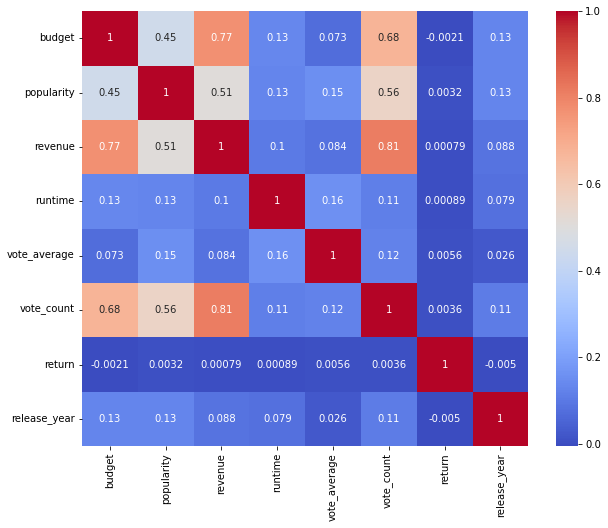

In [29]:
# Seleccionar solo las columnas numéricas
numeric_columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return', 'release_year']
# Calcular la matriz de correlación
correlation_matrix = df[numeric_columns].corr()
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 8))
# Visualizar la matriz de correlación como un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# Mostrar el gráfico
plt.show()

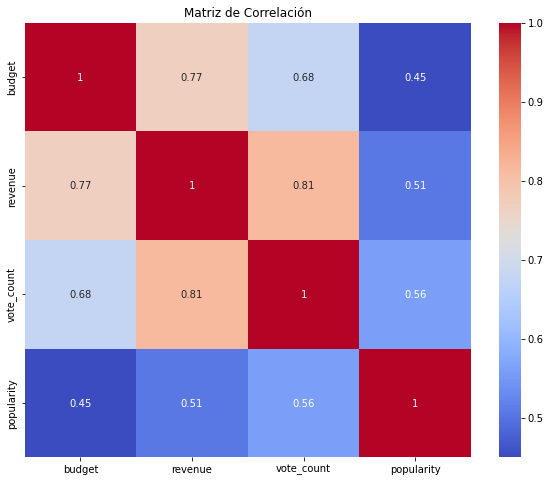

In [76]:
# Crear un DataFrame con las variables de interés
variables = df[['budget', 'revenue', 'vote_count', 'popularity']]

# Calcular la matriz de correlación
correlation_matrix = variables.corr()

# Visualizar la matriz de correlación como un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

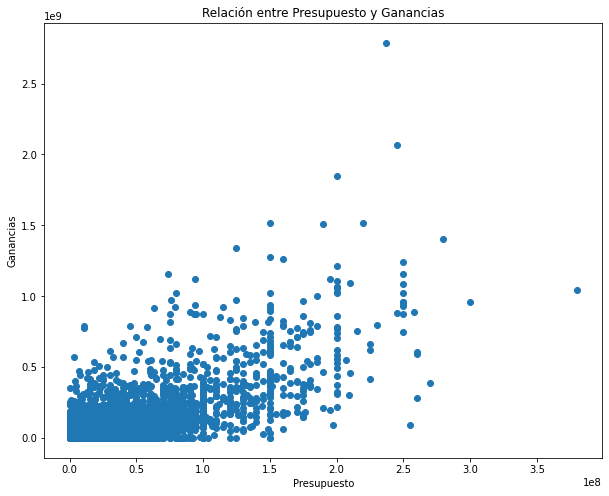

In [59]:
# Crear un scatter plot entre 'budget' y 'revenue'
plt.figure(figsize=(10, 8))
plt.scatter(df['budget'], df['revenue'])
plt.xlabel('Presupuesto')
plt.ylabel('Ganancias')
plt.title('Relación entre Presupuesto y Ganancias')
plt.show()

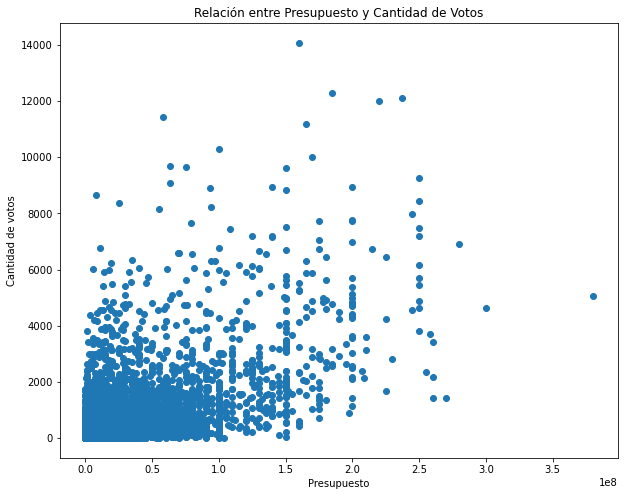

In [60]:
# Crear un scatter plot entre 'budget' y 'vote_count'
plt.figure(figsize=(10, 8))
plt.scatter(df['budget'], df['vote_count'])
plt.xlabel('Presupuesto')
plt.ylabel('Cantidad de votos')
plt.title('Relación entre Presupuesto y Cantidad de Votos')
plt.show()

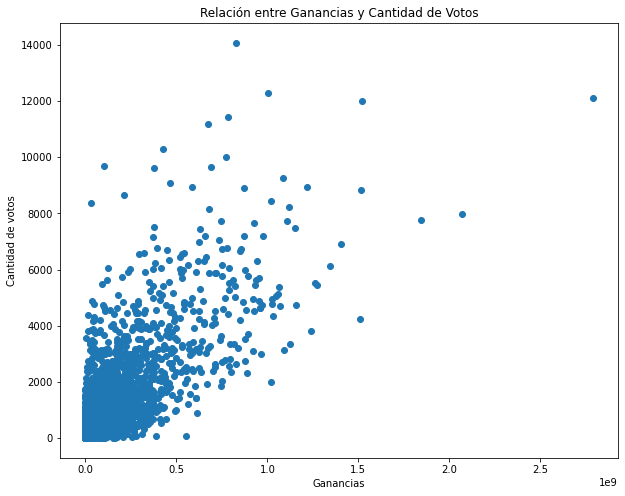

In [61]:
# Crear un scatter plot entre 'revenue' y 'vote_count'
plt.figure(figsize=(10, 8))
plt.scatter(df['revenue'], df['vote_count'])
plt.xlabel('Ganancias')
plt.ylabel('Cantidad de votos')
plt.title('Relación entre Ganancias y Cantidad de Votos')
plt.show()

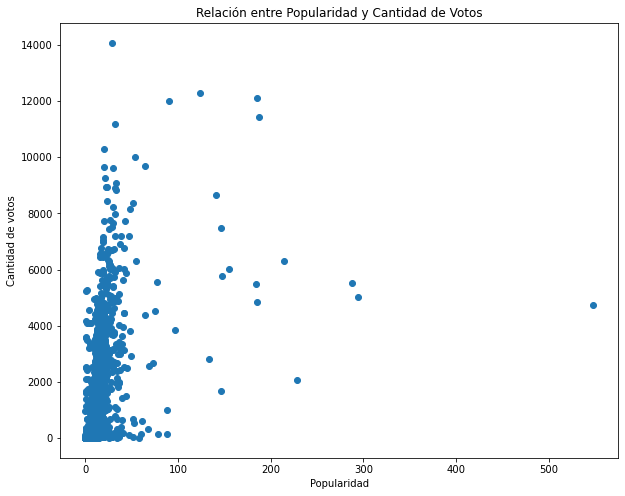

In [63]:
# Crear un scatter plot entre 'popularity' y 'vote_count'
plt.figure(figsize=(10, 8))
plt.scatter(df['popularity'], df['vote_count'])
plt.xlabel('Popularidad')
plt.ylabel('Cantidad de votos')
plt.title('Relación entre Popularidad y Cantidad de Votos')
plt.show()